In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2

In [35]:
files = os.listdir('resized_pics/')
rows = []
for f in files:
    img = cv2.imread(f'resized_pics/{f}')
    avg_color_per_row = np.average(img, axis=0)
    r, g, b = np.average(avg_color_per_row, axis=0)
    rows.append([f, r, g, b])

df = pd.DataFrame(rows, columns=['file', 'r', 'g', 'b'])
df.to_csv('analysis.csv')

In [23]:
df.head()

,file,r,g,b
0,ru6quk.jpg,54.694375,76.696875,101.442812
1,rszoou.jpg,100.305156,111.791719,119.518125
2,ru0twz.jpg,51.970312,82.556719,107.626719
3,rsjip2.jpg,117.648594,127.010469,155.982500
4,rtkbd8.jpg,125.276719,138.511406,147.894531


<AxesSubplot:xlabel='r', ylabel='Count'>

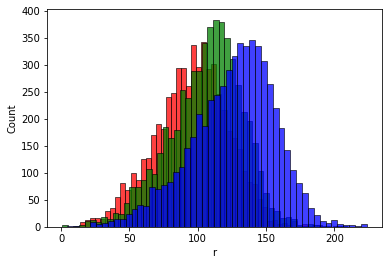

In [24]:
sns.histplot(data=df, x='r', bins=51, color='red')
sns.histplot(data=df, x='g', bins=51, color='green')
sns.histplot(data=df, x='b', bins=51, color='blue')

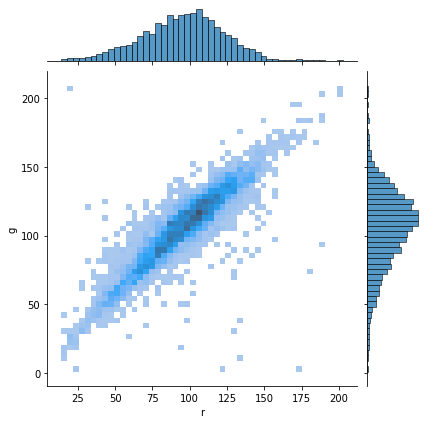

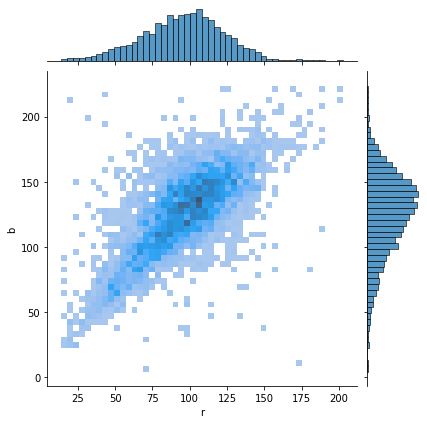

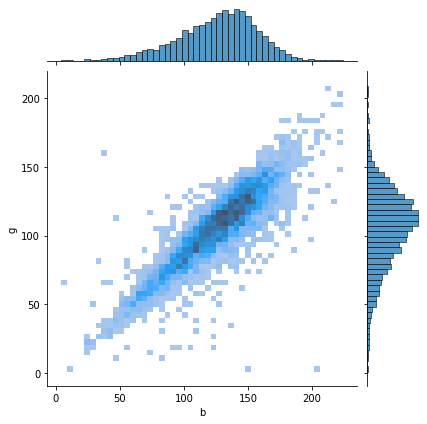

In [25]:
sns.jointplot(data=df, x='r', y='g', kind='hist')
sns.jointplot(data=df, x='r', y='b', kind='hist')
sns.jointplot(data=df, x='b', y='g', kind='hist')

<AxesSubplot:ylabel='Count'>

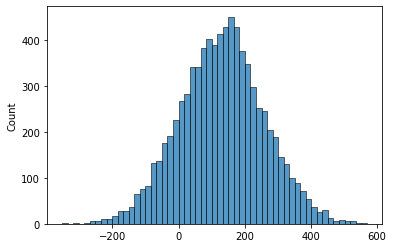

In [26]:
def mountain_flattener(array):
    median = np.median(array)
    new_array = []
    for x in array:
        if x == median:
            new_array.append(x)
        elif x < median:
            inv_proportion = 1 - ((median - x) / median)
            new_array.append((inv_proportion ** 5) * median)
        else:
            inv_proportion = 1 - (((x - median)) / (255 - median))
            new_array.append((inv_proportion ** 5) * (255 - median))
    return new_array

dist = np.random.normal(loc=128, scale=128, size=8000)
sns.histplot(data=dist)

In [28]:
values = df.values
new_colors = np.array([mountain_flattener(c) for c in values[:, 1:].transpose()])
files = df.values[:, 0]

new_values = np.concatenate((files.reshape(-1, 1), new_colors.transpose()), axis=1)

new_df = pd.DataFrame(new_values, columns=['file', 'r', 'g', 'b'])
new_df.head()

,file,r,g,b
0,ru6quk.jpg,5.593911,19.109816,38.311341
1,rszoou.jpg,141.13472,130.968413,86.974071
2,ru0twz.jpg,4.332902,27.614061,51.501686
3,rsjip2.jpg,77.878975,74.67894,38.251146
4,rtkbd8.jpg,58.525388,46.638322,56.642563


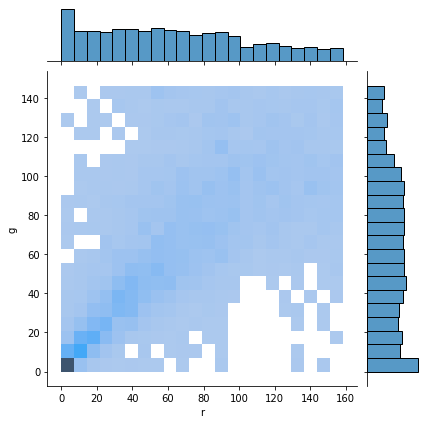

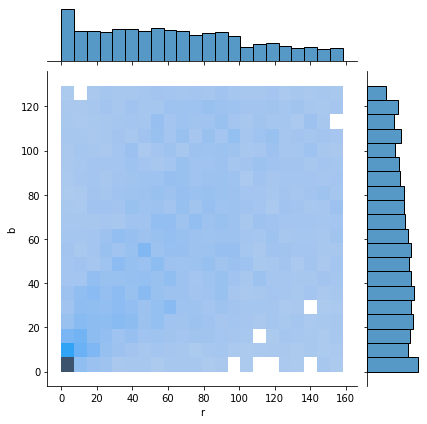

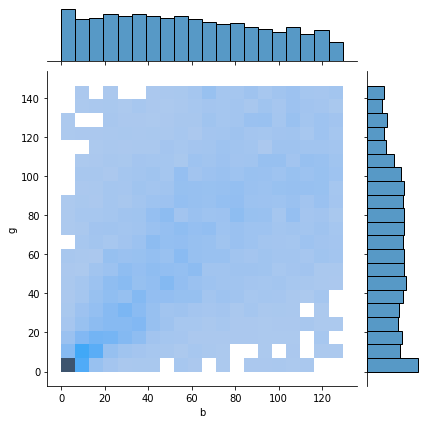

In [29]:
sns.jointplot(data=new_df, x='r', y='g', kind='hist')
sns.jointplot(data=new_df, x='r', y='b', kind='hist')
sns.jointplot(data=new_df, x='b', y='g', kind='hist')